Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip

Информацию о загрузке изображений и преобразовании их в numnpy-массивы вы можете найти в Базе знаний:


#Импорт библиотек и подготовка данных

##Импорт библиотек

In [23]:
# Импорт необходимых библиотек
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


##Подготовка данных

In [24]:
# Распаковка архива
!unzip -q bus.zip

# Путь к директории с данными
base_dir = '/content/bus'

# Параметры изображений
img_height = 64
img_width = 64
channels = 1  # градации серого

# Загрузка данных
x_data = []
y_data = []

for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = image.load_img(img_path,
                            target_size=(img_height, img_width),
                            color_mode='grayscale')
        x_data.append(image.img_to_array(img))
        y_data.append(0 if class_name == 'Входящий' else 1)

# Преобразование в numpy массивы
x_data = np.array(x_data) / 255.0  # нормализация
y_data = np.array(y_data)

# Преобразование в плоский формат для полносвязной сети
x_data = x_data.reshape((x_data.shape[0], img_height * img_width * channels))

# Разделение данных
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1,
                                                    stratify=y_data,
                                                    random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                 test_size=0.2,
                                                 stratify=y_train,
                                                 random_state=42)

# Учет дисбаланса классов
class_weights = {0: 1.0, 1: 6_485 / 2_596}  # взвешивание классов

replace Входящий/01009.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Входящий/03889.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


#Создание модели

In [19]:
# Создание модели
model = Sequential([
    Dense(512, input_shape=(img_height*img_width*channels,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,265,601 (8.64 MB)

 Trainable params: 2,263,809 (8.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

#Обучение модели

In [20]:
# Обучение модели
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    class_weight=class_weights,
                    verbose=1)

Epoch 1/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5671 - loss: 0.9711 - val_accuracy: 0.7333 - val_loss: 0.5434
Epoch 2/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7185 - loss: 0.7711 - val_accuracy: 0.7841 - val_loss: 0.4593
Epoch 3/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7351 - loss: 0.7143 - val_accuracy: 0.8336 - val_loss: 0.3888
Epoch 4/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7923 - loss: 0.6308 - val_accuracy: 0.8453 - val_loss: 0.3521
Epoch 5/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8016 - loss: 0.6001 - val_accuracy: 0.8391 - val_loss: 0.4057
Epoch 6/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8268 - loss: 0.5342 - val_accuracy: 0.8324 - val_loss: 0.3748
Epoch 7/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8339 - loss: 0.5243 - val_accuracy: 0.8789 - val_loss: 0.2790
Epoch 8/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8394 - loss: 0.5041 - val_acc

#Оценка качества обучения модели

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9578 - loss: 0.1355
Процент верных ответов на тестовых данных: 97.0 %


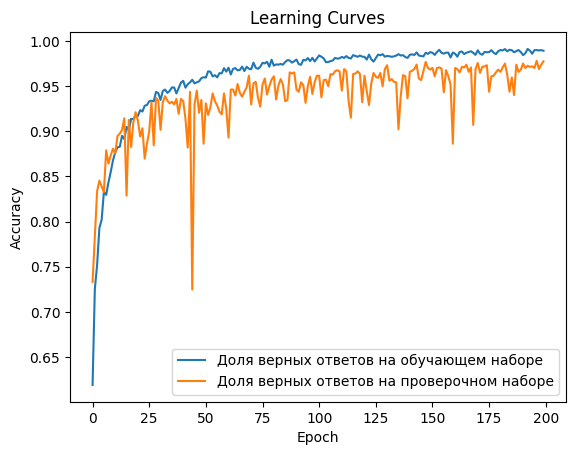

In [21]:
scores = model.evaluate(x_test,
                        y_test,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

# Визуализация обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()